In [1]:
import numpy as np
import pandas as pd
%display typeset

In [95]:
def modelito(t, comp, params):
    Q = comp[0]
    S = comp[1]
    E = comp[2]
    I = comp[3]
    Ic = comp[4]
    R = comp[5]
    D = comp[6]
    
    a1 = params[0]
    a2 = params[1]
    a3 = params[2]
    b1 = params[3]
    b2 = params[4]
    b3 = params[5]
    c = params[6]
    d = params[7]
    e = params[8]
    f = params[9]
    
    lam = c*(I)
    
    q=a1*(a2**(-(t-a3)**2))
    s=b1*(b2**(-(t-b3)**2))

    return [
        q*S -s*Q,             # dQ/dt
        -q*S + s*Q - lam*S,   # dS/dt
        lam*S - d*E,          # dE/dt
        d*E - (e+f)*I,        # dI/dt
        d*E,                  #dIc/dt
        f*I,                  # dR/dt
        e*I,                  # dD/dt
    ]

In [96]:
parames=[3.00000000e-01, 1.01000000e+00, 3.00000000e+01, 3.00000000e-01,
       1.01000000e+00, 2.00000000e+02, 6.89178055e-01, 1.58416313e-04,
       7.17521047e-05, 1.28598552e-06]

In [135]:
#Q, S, E, I, R, D, q, e, i, r, d
T = ode_solver()
T.function = modelito
T.algorithm='rk8pd'
inits = [0, 1 - 1e-3 , 0, 1e-3, 1e-3 , 0, 0]
tspan = [0,300]
T.ode_solve(tspan, inits, num_points=300, params=parames)

In [136]:
def get_simm_array(sol):
    sim = np.array([y for t,y in sol])
    return sim

In [137]:
pop=11640000
real_data = np.genfromtxt('csvzão.csv', delimiter=';')[1:]
data = []
for k in real_data:
    data.append((k[0], k[1]/pop, k[3]/pop))
    
data1 = [(item[0], item[1]) for item in data]
data2 = [(item[0], item[2]) for item in data]

plot7 = list_plot(data1, color = 'red', pointsize = 20, alpha = 1, legend_label = 'Ir')
plot8 = list_plot(data2, color = 'purple', pointsize = 20, alpha = 1, legend_label = 'Dr')

In [138]:
sim = get_simm_array(T.solution)
plot0 = list_plot(sim[:,0], color = 'green',  legend_label = 'Q')
plot1 = list_plot(sim[:,1], color = 'yellow',  legend_label = 'S')
plot2 = list_plot(sim[:,2], color = 'red',  legend_label = 'E')
plot3 = list_plot(sim[:,3], color = 'blue',  legend_label = 'I')
plot4 = list_plot(sim[:,4], color = 'purple',  legend_label = 'Ic')
plot5 = list_plot(sim[:,5], color = 'black',  legend_label = 'R')
plot6 = list_plot(sim[:,6], color = 'yellow',  legend_label = 'D')

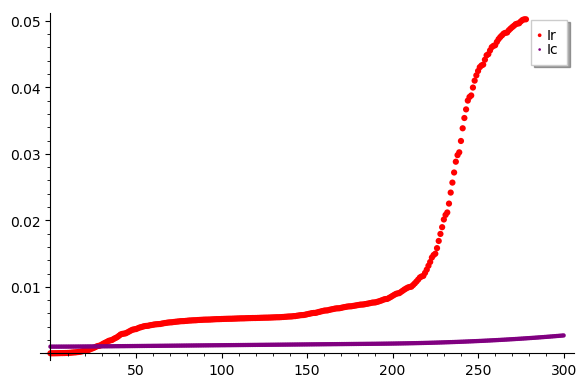

In [139]:
show(plot7+plot4)

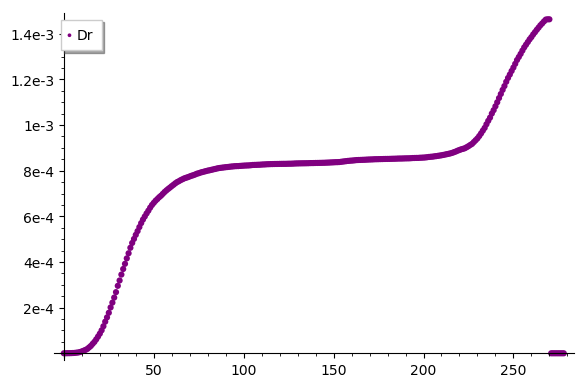

In [140]:
show(plot8)

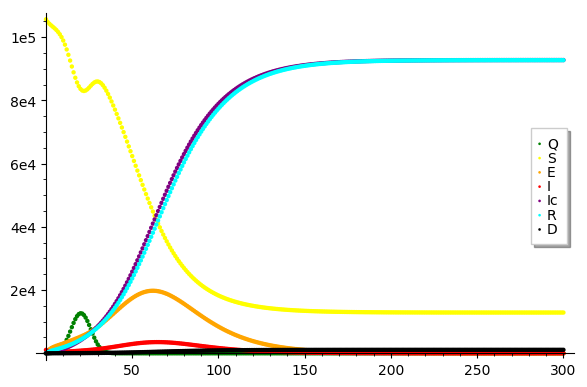

In [58]:
#Q, S, E, I, R, D, q, e, i, r, d
pop=106700
def plot_solt(sol):
    sim = get_simm_array(sol)*pop
    P = list_plot(sim[:,0],color='green',legend_label='Q')
    colors = ['yellow','orange','red','purple','cyan','black']
    for i,var in enumerate(['S','E','I','Ic','R','D']):
        P += list_plot(sim[:,i+1],color=colors[i],legend_label=var)
   
    show(P)
plot_solt(T.solution)